# Regressions, Regressions, Regressions

Linear Regressions are one of the simplest form of projection and as such are a very common task in Data Science. Unsurprisingly there are a numerous approaches to and techniques for handling Linear Regressions. These include traditional statistical techniques, structured machine learning and deep learning approaches.

Having completed Data Scientist with Python Track at DataCamp. I created this project as a focus for looking back over the different methods i've learnt on the course and going on to do do further reseach on some of the approaches that were mentioned but not discussed in detail. 

Within the project we'll apply each of the approaches to the same dataset so that we can see how the different techniques compare.

# Selecting a Dataset

There are many datasets commonly used to demonstrate regression. We are going to look at a dataset from Gapminder.
The dataset contains a variety data mainly numerical data, taken from a number of countries. There are enough number datapoints to train and test our model. There should be a strong enough relationship between 2 of the features that we can create a regression using only statistcal techniques yet enough additional features that we should be able to build a machine learning model that will identify them.

## The Gapminder Dataset 2008 

The Gapminder Foundation is a non-profit venture based in Sweden, that promotes sustainable global development by increased use and understanding of statistics and other information about social, economic and environmental development at local, national and global levels.

We are going to use the freely available gm_2008_region.csv dataset:

Number of datapoints : 139

Number of observations : 10

observations (in alphabetical order):

BMI_female - Body Mass Index (BMI), women, Kg/m2
    
BMI_male - Body Mass Index (BMI), men, Kg/m2

child_mortality - Child mortality (0-5 year-olds dying per 1,000 born)

CO2 - CO2 emissions (tonnes per person)

fertility - Number of Cildren born per woman

GDP - Gross Domestic Product, total

HIV - HIV deaths in children 1-59 months (per 1,000 births)

life - Average life expectancy 

population - Population, total

Region - Region of the world

Missing Attribute Values: None



Source: https://www.gapminder.org/data/

In [35]:
## Explore the Gapminder Dataset ##

# Get libraries
import pandas as pd
import numpy as np

# import the data
lf=pd.read_csv('Data/gm_2008_region.csv',encoding = "ISO-8859-1", sep=',',index_col='Unnamed: 0')

print("\n" + str(lf.shape))
print("\n" + str(lf.columns))
print("\n" + str(lf.describe()))


(139, 10)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region'],
      dtype='object')

         population   fertility         HIV         CO2    BMI_male  \
count  1.390000e+02  139.000000  139.000000  139.000000  139.000000   
mean   3.549977e+07    3.005108    1.915612    4.459874   24.623054   
std    1.095121e+08    1.615354    4.408974    6.268349    2.209368   
min    2.773150e+05    1.280000    0.060000    0.008618   20.397420   
25%    3.752776e+06    1.810000    0.100000    0.496190   22.448135   
50%    9.705130e+06    2.410000    0.400000    2.223796   25.156990   
75%    2.791973e+07    4.095000    1.300000    6.589156   26.497575   
max    1.197070e+09    7.590000   25.900000   48.702062   28.456980   

                 GDP  BMI_female        life  child_mortality  
count     139.000000  139.000000  139.000000       139.000000  
mean    16638.784173  126.701914   69.602878        45.097122  
std    

## Plotting Life Expectancy and fertility from the Gapminder Dataset

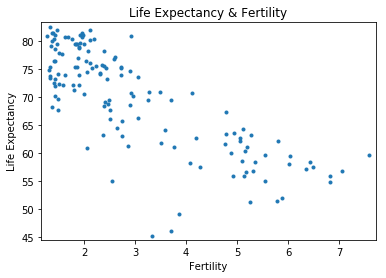

In [38]:
## Plot Life expectancy and fertility ##

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import the data
lifeexp=lf['life'].values
fertility=lf['fertility'].values

# Plot the life expectancy against fertility
_ = plt.plot(fertility, lifeexp, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)

# Label Graph and Show the plot
_ = plt.title('Life Expectancy & Fertility')
_ = plt.xlabel('Fertility')
_ = plt.ylabel('Life Expectancy')
plt.show()

# Linear Relationships

A Linear relationship is a relationship between a variable y and one or more other variables, in which the variables moves in direct proportion to each other.

In the case of a relationship between just 2 variable x and y this is called a simple linear relationship. In reality there are likely to be a number of variables that all have an affect on any given variable. Where each variable has a linear relationship this can be described as a multi variant Linear Relationship.


# Linear Relationships

A linear relationship can be expressed as the slope of the line and the intercept of the line on the y axis.

>f=al+b , where a is the slope and b is the intercept

# Pearson's Coefficient

Pearson's Coefficient is a measure of the bivariant correlation between 2 variables X and y.

A Pearson's Coefficient of close to 1 describes a relationship with a strong positive relationsship where y increase as X increases. A pearson's of close -1 describes a strong inverse relationship where y decreases as X increases. A Pearson's Coefficient of close to 0 indicates a relationship where there is no relationship between X and y.

In [239]:
## Pearson's correlation coefficient ##

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]

lifeexp=lf['life'].values
fertility=lf['fertility'].values
print("\nPeason's Coefficient : " + str(pearson_r(lifeexp, fertility)))


Peason's Coefficient : -0.7869207182264321


A pearson's correlation of -0.78 signifies a relationship where both variables move in the same direction (as X goes up so does y) with a relatively consistant result, that is to say that a significant number of datapoints plotted adhere to the general pattern. Suggesting a reliable Linear Regression could be produced.

# Technique 1 : Simple Linear Regression using Least squares

The first regression technique we'll look at is to use a technique called Least Squares to find a Simple Linear Regression.

For this regression we will use numpy and pandas to handle the maths, we will use matplotlib to generate the graphs and well write a function to do calculate the pearson's coefficient.

## Least squares

In order to work out the optimal line for a Least Squares linear regression you can use the 'Least squares' method, this is the process of finding the parameters for which the sum of the squares of the residuals is minimal.

## Residuals

If you take any given data point in the data set its distance from the linear regression line in the y axis is called its residual.

slope = -4.44387898978285
intercept =  82.95721361742588


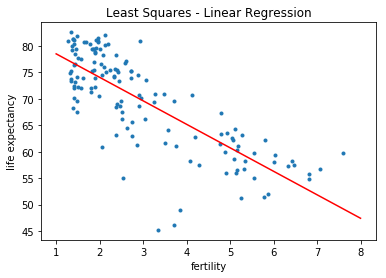

In [247]:
## Least squares Linear Regression ##
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lifeexp=lf['life'].values
fertility=lf['fertility'].values

# Plot the illiteracy rate versus fertility
_ = plt.plot(fertility, lifeexp, marker='.', linestyle='none')

# Label Graph
_ = plt.title('Least Squares - Linear Regression')
_ = plt.xlabel('fertility')
_ = plt.ylabel('life expectancy')


# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(fertility,lifeexp,1)

# Print the results to the screen
print('slope =',a)
print('intercept = ',b)
# Make theoretical line to plot
x = np.array([1,8])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y,color='red')

# Draw the plot
plt.show()

# Getting the values from Scipy

TheSpicy stats.linregress method has functions to calculations for the slope, intercept, r value and p value and std error.

In [253]:
from scipy import stats
import numpy as np
x=lf['fertility'].values
y=lf['life'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print ("Slope : ", slope)
print ("r value : ", r_value)
print ("r Squared : ", r_value**2)
print ("p value : ", p_value)
print ("Std error : ", std_err)

Slope :  -4.443878989782841
r value :  -0.7869207182264321
r Squared :  0.6192442167740037
p value :  1.6189799276572946e-30
Std error :  0.2977105432790615


## Is it optimal?

The np.polyfit() method calculates the sum of sqaures for the residuals to determine the linear regression, but how do we know that this is the optimal fit for the relationship? We can plot the the residual sum of squares (RSS) versus the slope parameter a for the function. To do this, we fix the intercept to intercept taken from the optimization. Then, plot the RSS (residual sum of squares) versus the slope a. Where the curve is at its minimal value this is the optimal slope for the regression.

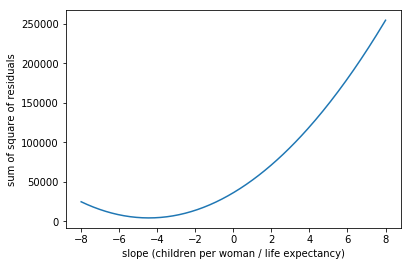

In [254]:
## Is it optimal? ##

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lifeexp=lf['life'].values
fertility=lf['fertility'].values

# Specify slopes to consider: a_vals
a_vals = np.linspace(-8,8,200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((lifeexp - a*fertility - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / life expectancy)')
plt.ylabel('sum of square of residuals')

plt.show()

As we can see the lowest point on the graph is at -4.4 which confirms that the optimal slope for our linear regression is correct.

# Bootstrapping the Regression Model

In simple terms Bootstapping is a technique that takes the data from a datasample and generates new samples for it using random selection with replacement. This allows you to retest slight variations of your original data sample  over and over again using real data. By comparing the results of a large number of these variations of the original results, you are able to establish things like a confidence intervals for the model.

Bootstrapping is particularly relevant where the original datasample is quite small and you want to reassure youself that the regression is not being affected by the size of the dataset.

[-4.98533091 -3.96451477]


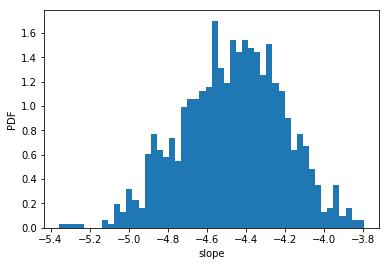

In [257]:
## Generating a pairs bootstrap of lifeexcectancy/fertility data ##

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Compute function to return slope and intercept
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

# get the data
lifeexp=lf['life'].values
fertility=lf['fertility'].values

# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(fertility,lifeexp, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps,[2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

Linear Regression Slope :  -4.314476191272158
Average bootstrape slope : -4.468255617815897


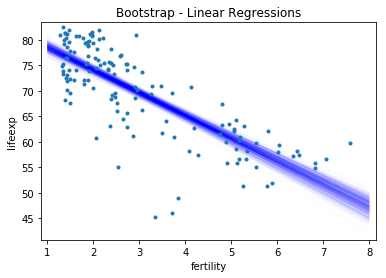

In [285]:
## Plotting bootstrap regressions ##

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 

# get the data
lifeexp=lf['life'].values
fertility=lf['fertility'].values

# Generate array of x-values for bootstrap lines: x
x = np.array([1,8])

boot_slope=[]
# Plot the bootstrap lines
for i in range(1000):
    y=(bs_slope_reps[i]*x + bs_intercept_reps[i])
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    boot_slope.append(slope)
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.02, color='blue')
# Average bootstrap slope    
bootslope=np.array(boot_slope)
print ("Linear Regression Slope : ", slope)
print("Average bootstrape slope : " + str((bootslope.mean())))
    
# Plot the data
_ = plt.plot(fertility,lifeexp,marker='.',linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.title('Bootstrap - Linear Regressions')
_ = plt.xlabel('fertility')
_ = plt.ylabel('lifeexp')
plt.margins(0.02)

plt.show()

The plot shows the linear regressions for 1000 bootstrapped datasets based on the original dataset, the slopes of which are all very similar to the slope of our Simple Linear Regression giving us a good confidence interval for the Regression.

# Hypothesis testing the Linear Regression

If we have some data and we compute a pearson correlation suggesting that there is a correlation between 2 of the variable, but we are not absolutely sure how real this correlation is, we can use a hypothesis test to work out if the pearson correlation is truely because there is a relationship or whether this score could happen by chance alone.

To do this :

• Posit null hypothesis: the two variables are completely uncorrelated.

• Simulate data assuming null hypothesis is true

• Use Pearson correlation, ρ, as test statistic

• Compute p-value as fraction of replicates that have ρ at least as large as observed.

In [106]:
## Hypothesis test of Correlation ##

import numpy as np
import pandas as pd

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]

# get the data
lifeexp=lf['life'].values
fertility=lf['fertility'].values

# Compute observed correlation: r_obs
r_obs = pearson_r(fertility,lifeexp)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute lifeexp measurments: lifeexp_permuted
    lifeexp_permuted =  np.random.permutation(lifeexp)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(fertility,lifeexp_permuted )

# Compute p-value: p
p = np.sum(perm_replicates[i] >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0001


A p-value of 0.0001 is close to zero which signifying that the hypothesis that the two variables are completely uncorrelated is false and that there is a linear realtionship between life expectancy and Fertility Rate. 

# Technique 2 : plotting a Simple Linear Regression with seaborn

seaborn is a library that sits on top of matplotlib, making it both easier to access your data (because seaborn picks up axis titles etc for you without you having to tell it to) and producing more sophisticated plots (by default seaborn will adds the linear regression and confidence interval when plotting 2 features)

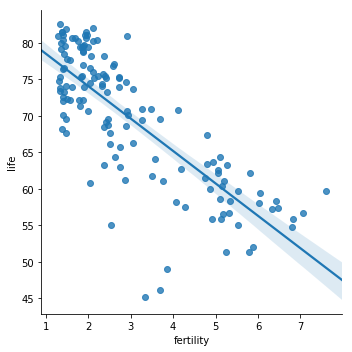

In [4]:
## plotting a Simple Linear Regression with seaborn ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x= 'fertility', y='life', data=lf) 
plt.show()

## Seaborn Pairplots
If you pass seaborn's Pairplot the name of the dataframe it will produce a matrix of each of the relationships between features of the dataset.

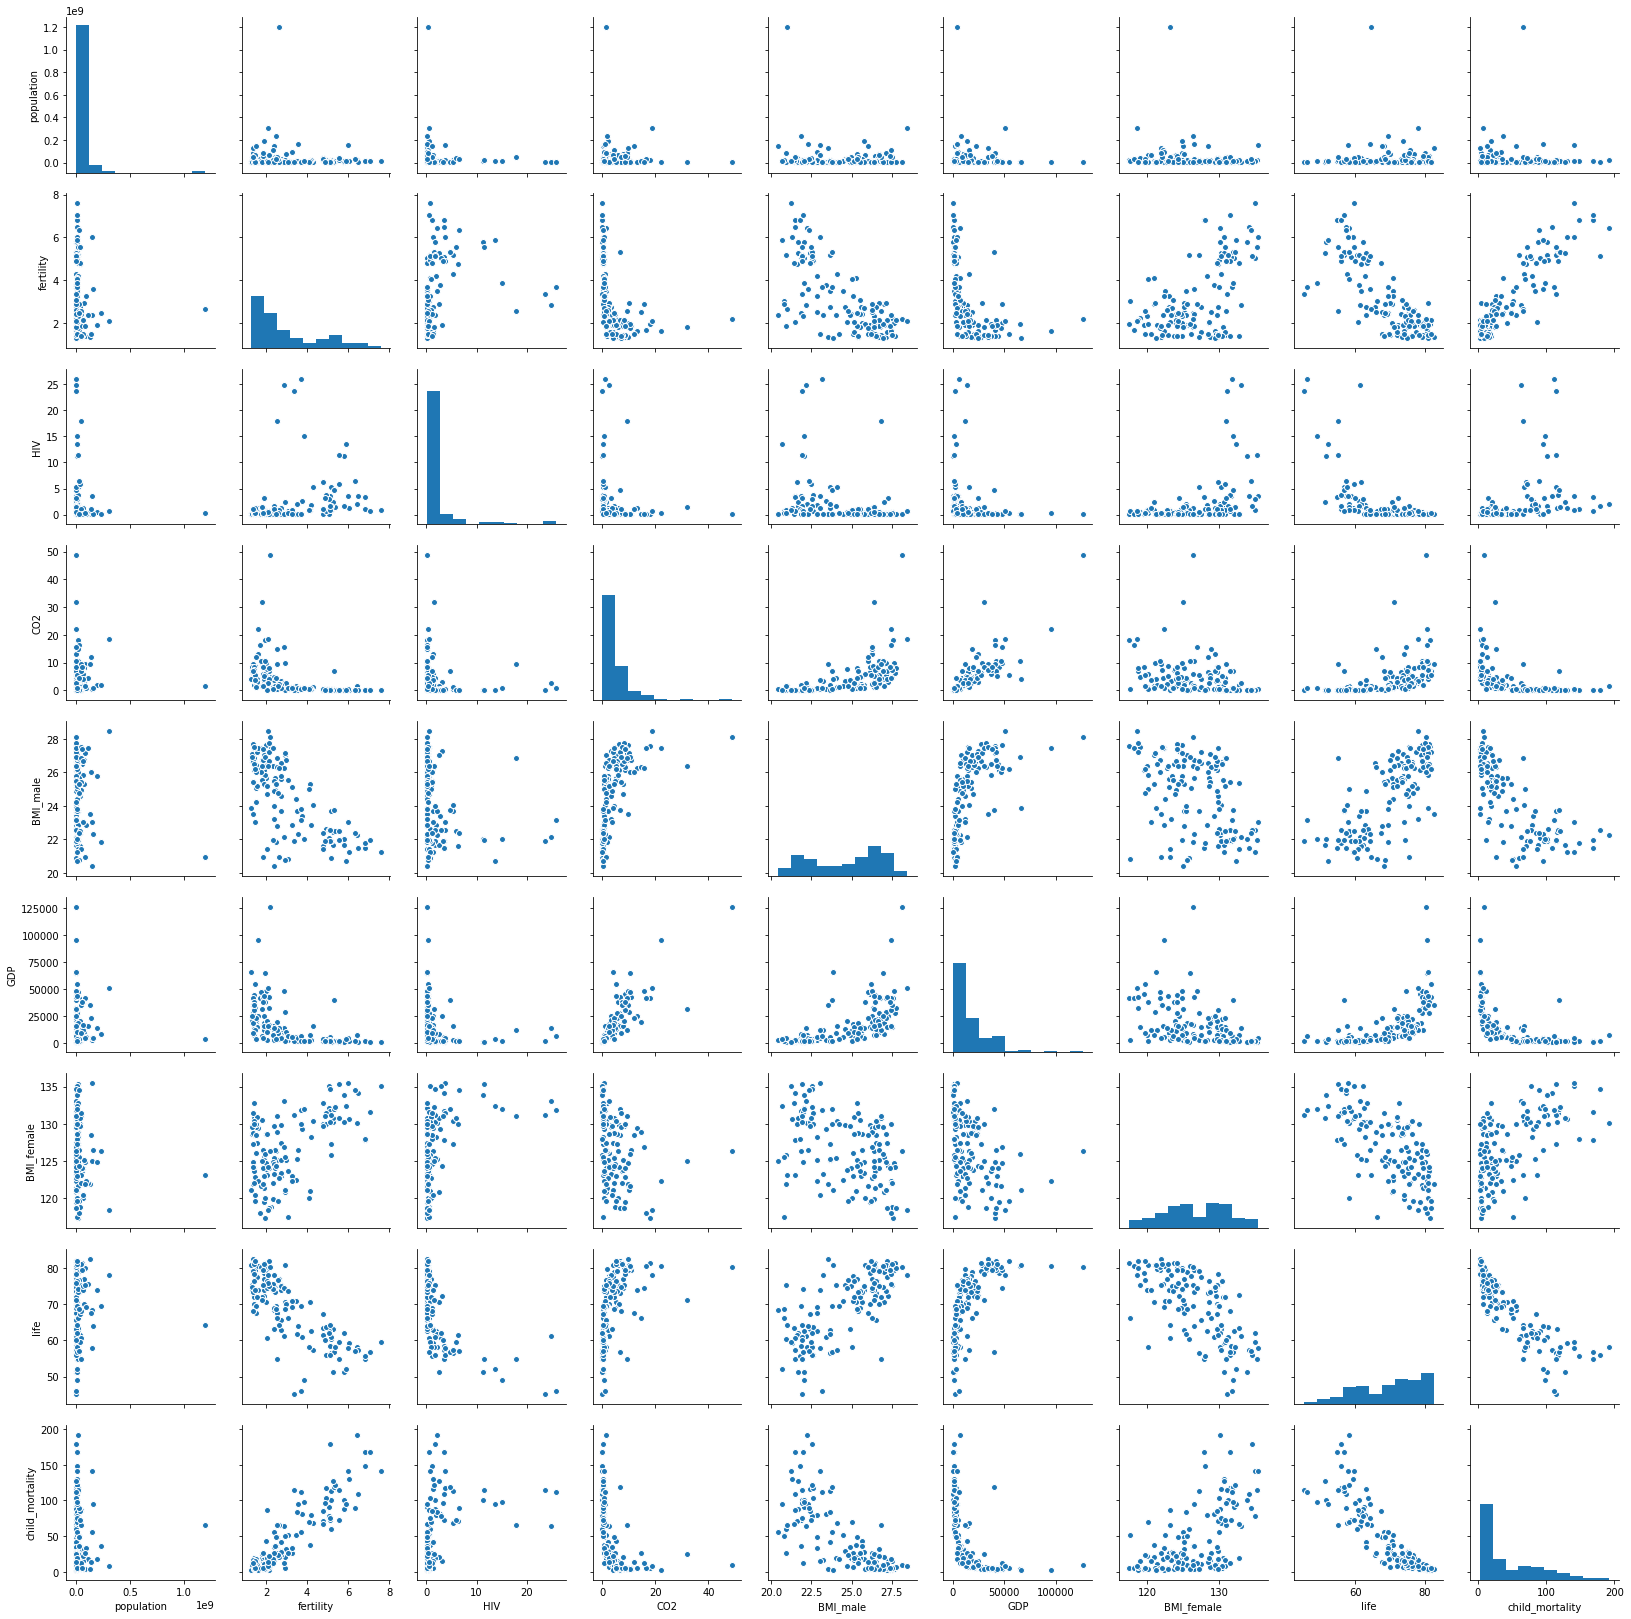

In [28]:
## plotting a Simple Linear Regression with seaborn ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(lf) 
plt.show()

The pairsplot matrix, Shows that generally fertility has the most linear relationships with strong linear relationships with both life and child mortality and also some degree of linearity with both male and female bmi.

There are aso linear relationships between Co2 and GDP and life expectancy and child mortality.

If you pass seaborn's Pairplot a list of features for the X and a list of features for the Y axis it will plot multiple linear regressions side by side.

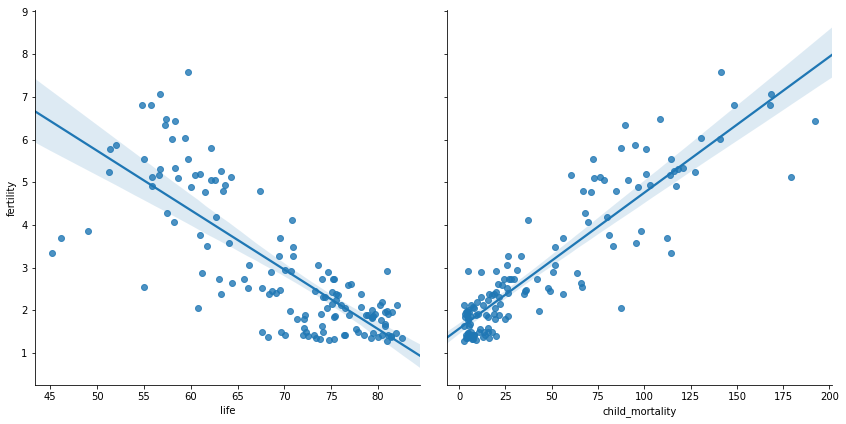

In [20]:
## pairplot Linear Regressions for life expectancy and child mortality against fertility with seaborn ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(lf, x_vars=['life','child_mortality'],y_vars=['fertility'], kind="reg", size=6) 
plt.show()

The pairs plot indicated that there are linear relationships between both life expectancy and child mortality against fertility. Life expectancy and fertality have a negative slope meaning they move in the same directions, whereas child mortality and fertality have a positive slope meaning they move in opposite directions (one goes up as the other comes down).

## Seaborn Jointplot

Seaborn's jointplot allows you to show the linear regression while plot the distributions of both variable along the axis of a plot. This allows you to see a lots of data in a single figure. 

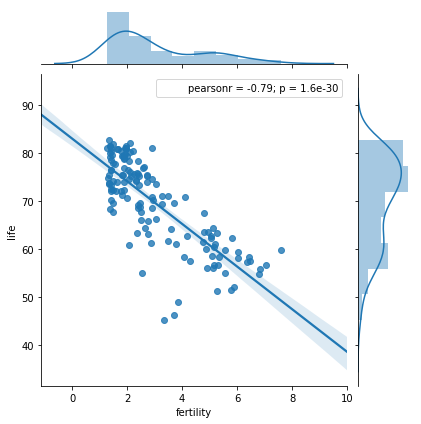

In [14]:
## plotting a Simple Linear Regression with seaborn ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.jointplot(x= 'fertility', y='life',data=lf, kind="reg") 
plt.show()

## Seaborn Jointplot with kde 

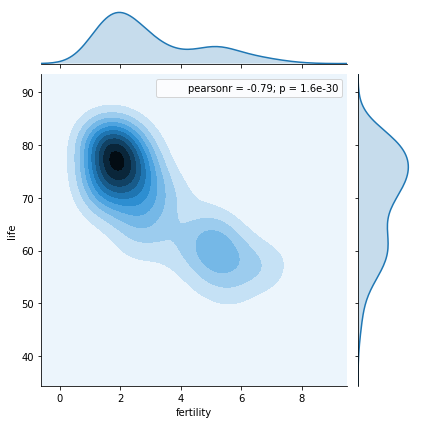

In [29]:
## plotting a Simple Linear Regression with seaborn ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.jointplot(x= 'fertility', y='life',data=lf, kind="kde") 
plt.show()

Viewing the jointplot with kind 'kde' simplifies the plot showing the main plot as a heat map and smoothing the distributions along either axis and giving a more generalized idea of what the data shows. For our data it shows that the majority of countries have a fertility of 2 and an average life expectancy of between 70 and 85. Fertility increase as life expectancy reduces in a more or less linear pattern. There is a secondary cluster with a fertility of 5 and and a life expectancy of around 60. While this can be seen in the scatter plot its more apparent in this kde plot.

## Seaborn Residual Plot

Seaborn has a built in method .residplot that allows you to see the linear regression on the x-axis with the residual displayed vertically to either side of it. This is a really easy way to visualize the distribution of these residuals. 

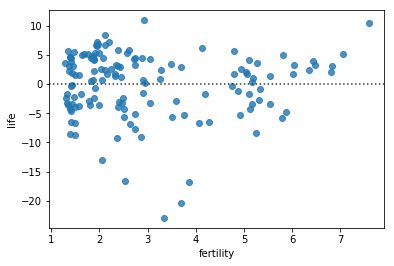

In [23]:
## plotting a Simple Linear Regression with seaborn ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.residplot(x= 'fertility', y='life',data=lf) 
plt.show()

The residuals plot shows that the distribution of datapoints around the regression line is reasonably evan, but that the there is a slightly wider spead of points where life expectancy in lower and that in fact there are 5 datapoints that could be considered outliers, with fertility of between 2 and 4 and a residuals of between -10 and -25.If these were removed the regression line would more up by a small margin.

# Higher-order regressions using sns.regplot()

In the real world realationships between two variables are often very complex, a simple first order regression is not sufficient to accurately capture the relationship and higher order regressions are required. Seaborn allows you to compute and visualize regressions of varying orders, using sns.regplot()

When working with compare higher order regressions its important to see how the residual changes depending on the order of the regression. Does a second order regression perform significantly better than a simple linear regression?

A key difference between sns.lmplot() and sns.regplot() is the way in which matplotlib options are passed. (sns.regplot() is more permissive).

For both sns.lmplot() and sns.regplot(), the keyword order is used to control the order of polynomial regression.

The function sns.regplot() uses the argument scatter=None to prevent plotting the scatter plot points again.

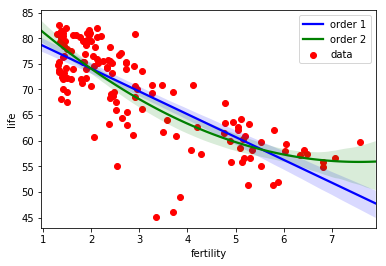

In [25]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt; import seaborn as sns

# Generate a scatter plot of 'life expectancy' and 'fertility' using red circles
plt.scatter(lf['fertility'], lf['life'], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'life expectancy' and 'fertility'
sns.regplot(x='fertility', y='life', data=lf, scatter=None, label='order 1', color='blue')

# Plot in green a linear regression of order 2 between 'life expectancy' and 'fertility'
sns.regplot(x='fertility', y='life', data=lf, scatter=None, label='order 2', color='green', order=2)

# Add a legend and display the plot
plt.legend(loc='upper right')

plt.show() 

Higher order regressions shows that there is a gently curved regression at the top and bottom ends of the Linear Regression, this was also shown to some degree in the jointplot with kde, but is far clearer here. Indicating that at the extrems the linear regression is slighly less reliable.

# Technique 3 : Supervised Learning using sklearn

In a Supervised learning Regression task the Target value is a Continuously varring variable. We identify a number of features in the data and try to fit these to predict the Target variable.

For this regression we will numpy and pandas fro the dataframe, we'll use matplotlib to draw the plots and sklearn for the machine learning.

0.6192442167740035


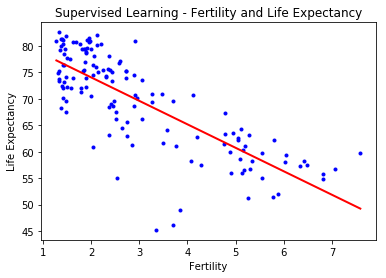

In [57]:
## Fit & predict - Linear Regression ##

# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create arrays for features and target variable
y =lf['life'].values
X_fertility=lf['fertility'].values

# Reshape X and y
y = y.reshape(-1,1)
X_fertility = X_fertility.reshape(-1,1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility,y))

# Plot data points
plt.scatter(X_fertility, y,marker='.',color='blue')

# Plot regression line
plt.plot(prediction_space, y_pred, color='red', linewidth=2)

# Label Graph
_ = plt.title('Supervised Learning - Fertility and Life Expectancy')
_ = plt.xlabel('Fertility')
_ = plt.ylabel('Life Expectancy')

#show plot
plt.show()

The Linear regression produced is almost identical to the one produced with least squares.

# Using Lasso Regression to identify Feature importance

Unlike with the Simple Linear Regression we undertook with Technique 1 which was only capable of looking as 2 features, a Supervised Learning Model allows us to perform a (Lasso) regression on all of the features. 

Rasso regression looks at all the features and identifies the important features by reducing the imporance of less significant features to zero.

We are going to look at which features have an impact on the fertility or number of children born per female.

[-1.45525059e-11 -0.00000000e+00 -0.00000000e+00 -3.52995879e-02
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  2.79890740e-02]


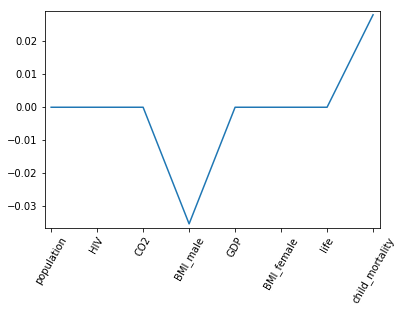

In [295]:
## Fit & predict - Lasso Regression to identify feature importance for fertility ##

# import the data
lf=pd.read_csv('Data/gm_2008_region.csv',encoding = "ISO-8859-1", sep=',',index_col='Unnamed: 0')

# drop none numeric column in lf
lf= lf.drop('Region', axis=1)

# Create arrays for features and target variable
y=lf.fertility.values
X= lf.drop(['fertility'], axis=1).values
lf_columns=lf.drop(['fertility'], axis=1).columns

# Reshape X and y
# y = y.reshape(-1,1)
# X = X.reshape(-1,1)

# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.01, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(lf_columns)), lasso_coef)
plt.xticks(range(len(lf_columns)), lf_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

The lasso regression suggests that the features important to fertility are child mortality and male bmi. 

This indicates that while we've shown a linear relationship between the Life expectancy of a country and the number of children born per female relationship is not a causal one.

[-0.00000000e+00 -4.12129267e-01  0.00000000e+00  1.44155041e-01
  5.49253471e-05 -1.61698111e-01 -1.05840073e-01]


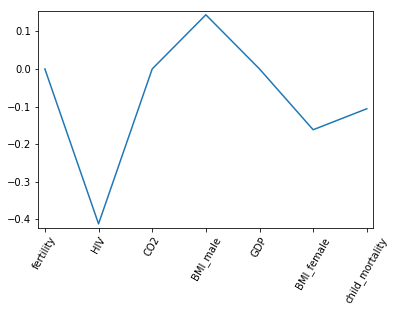

In [286]:
## Fit & predict - Lasso Regression to identify feature importance for life expectancy ##

# drop none numeric column in lf
# lf= lf.drop('Region', axis=1)

# Create arrays for features and target variable
y=lf.life.values
X= lf.drop(['life','population'], axis=1).values
lf_columns=lf.drop(['life','population'], axis=1).columns

# Reshape X and y
# y = y.reshape(-1,1)
# X = X.reshape(-1,1)

# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.1, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(lf_columns)), lasso_coef)
plt.xticks(range(len(lf_columns)), lf_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

The lasso regression for life expectancy shows the features that have a significant effect on life expectancy. This shows that fertility is not a significant factor in lefe expectancy, male BMI surprisingly has a positive effect on life expectancy, while female bmi has a negative effect as does HIV (HIV deaths in children 1-59 months per 1,000 births) and Child mortality (0-5 year-olds dying per 1,000 born)

This indicates that while there is a linear relationship between the Life expectancy of a country and the number of children born per female relationship is not a causal one.

# Technique 4 : Multi Feature Linear Regression with statsmodel

Based on the example at https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

In [9]:
## Linear regression using statsmodels without a constant ##

import statsmodels.api as sm
import numpy as np
import pandas as pd

# load dataset
dataframe =pd.read_csv('Data/gm_2008_region.csv',encoding = "ISO-8859-1", sep=',',index_col='Unnamed: 0')
# split into input (X) and output (Y) variables
y=dataframe['fertility'].values
# drop none numeric column in lf
dataframe= dataframe.drop(['Region','fertility'], axis=1)
dataset = dataframe.values
X = dataset[:,1:8]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     455.1
Date:                Thu, 12 Apr 2018   Prob (F-statistic):           3.94e-89
Time:                        01:12:58   Log-Likelihood:                -143.62
No. Observations:                 139   AIC:                             301.2
Df Residuals:                     132   BIC:                             321.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0355      0.018     -1.931      0.056      -0.072       0.001
x2            -0.0135      0.018     -0.770      0.442      -0.048       0.021
x3            -0.0455      0.044     -1.030      0.305      -0.133       0.042
x4          5.155e-06   6.43e-06      0.802      0.424   -7.56e-06    1.79e-05
x5             0.0248      0.010      2.525      0.013       0.005       0.044
x6            -0.0046      0.016     -0.289      0.773      -0.036       0.027
x7             0.0297      0.003     10.780      0.000       0.024       0.035
==============================================================================
Omnibus:                        4.977   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                7.048
Skew:                          -0.032   Prob(JB):                       0.0295
Kurtosis:                       4.101   Cond. No.                     1.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
## Linear regression using statsmodels with a constant ##

import statsmodels.api as sm
import numpy as np
import pandas as pd

# load dataset
dataframe =pd.read_csv('Data/gm_2008_region.csv',encoding = "ISO-8859-1", sep=',',index_col='Unnamed: 0')
# split into input (X) and output (Y) variables
y=dataframe['fertility'].values
# drop none numeric column in lf
dataframe= dataframe.drop(['Region','fertility'], axis=1)
dataset = dataframe.values
X = dataset[:,1:8]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     87.64
Date:                Thu, 12 Apr 2018   Prob (F-statistic):           2.61e-46
Time:                        02:45:09   Log-Likelihood:                -142.64
No. Observations:                 139   AIC:                             301.3
Df Residuals:                     131   BIC:                             324.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1954      3.067      1.368      0.174      -1.872      10.263
x1            -0.0427      0.019     -2.239      0.027      -0.080      -0.005
x2            -0.0138      0.018     -0.789      0.432      -0.048       0.021
x3            -0.0606      0.045     -1.334      0.185      -0.150       0.029
x4          6.853e-06   6.53e-06      1.050      0.296   -6.06e-06    1.98e-05
x5             0.0047      0.018      0.266      0.791      -0.030       0.040
x6            -0.0219      0.020     -1.085      0.280      -0.062       0.018
x7             0.0279      0.003      9.146      0.000       0.022       0.034
==============================================================================
Omnibus:                        6.682   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.035   Jarque-Bera (JB):               10.991
Skew:                          -0.106   Prob(JB):                      0.00411
Kurtosis:                       4.361   Cond. No.                     1.32e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Performance

We can see how well the model works by plotting the model's predictions against and the actual observations. If we Look first at a Simple Linear Regression where we are only taking 1 Feature into consideration, the Linear Regression is in the form of a line, all predictions are points on the line based on life expectancy alone.

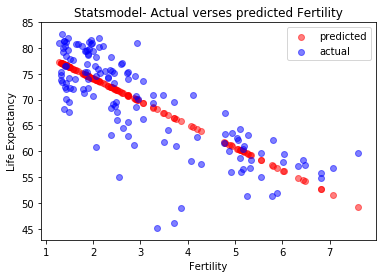

In [63]:
## Simple Linear Regression using SKLearn predictions versus actuals ##

# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create arrays for features and target variable
y =lf['life'].values
X_fertility=lf['fertility'].values

# Reshape X and y
y = y.reshape(-1,1)
X_fertility = X_fertility.reshape(-1,1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

y_pred = reg.predict(X_fertility)

import matplotlib.pyplot as plt

# Generate a scatter plot of 'life expectancy' and 'fertility' using red circles
plt.scatter(X_fertility, y_pred, label='predicted', color='red',alpha=0.5, marker='o')
plt.scatter(X_fertility,y, label='actual', color='blue',alpha=0.5, marker='o')
  
# Label Graph and show plot
_ = plt.title('Statsmodel- Actual verses predicted Fertility')
_ = plt.xlabel('Fertility')
_ = plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

This is a reasonable approximation but there are some outliers where the regression doesn't work as well which will have higher residuals.

Next we will look at the same plot but  this time where we have used a multi feature linear model.

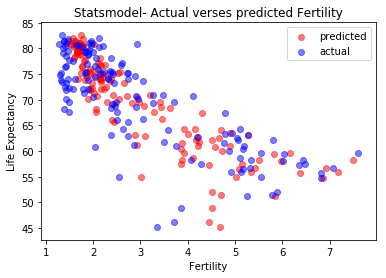

In [54]:
## Plot the predictions versus actuals ##

# Generate a scatter plot of 'life expectancy' and 'fertility' using red circles
plt.scatter(predictions,dataframe.life, label='predicted', color='red',alpha=0.5, marker='o')
plt.scatter(y,dataframe.life, label='actual', color='blue',alpha=0.5, marker='o')
  
# Label Graph and show plot
_ = plt.title('Statsmodel- Actual verses predicted Fertility')
_ = plt.xlabel('Fertility')
_ = plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

This Time instead of the predictions being in a straight line as with the Simple Linear Regression, they look far closer to the real data. The model is not perfect, the predictions are generally are a little more clustered than the real data, and slightly to the right for some of the outliers, but the overall degree of error is far lower.

# Technique 5 : Linear Regression with Tensorflow

Tensorflow is an open source machine learning (ML) library from Google. It has particularly became popular because of the support for Deep Learning.

While the datacamp course covers Tensorfow, this particular code was adapted from the code at https://github.com/aymericdamien/TensorFlow-Examples

Epoch: 0050 cost= 566.164306641 W= 15.066542 b= 10.796879
Epoch: 0100 cost= 467.880981445 W= 13.277871 b= 17.575949
Epoch: 0150 cost= 386.963531494 W= 11.617983 b= 23.717083
Epoch: 0200 cost= 320.344970703 W= 10.111796 b= 29.289251
Epoch: 0250 cost= 265.498657227 W= 8.745144 b= 34.34518
Epoch: 0300 cost= 220.344177246 W= 7.5051103 b= 38.932713
Epoch: 0350 cost= 183.167724609 W= 6.379936 b= 43.095383
Epoch: 0400 cost= 152.561035156 W= 5.3589835 b= 46.87238
Epoch: 0450 cost= 127.362869263 W= 4.4326158 b= 50.299477
Epoch: 0500 cost= 106.617576599 W= 3.5920777 b= 53.40908
Epoch: 0550 cost= 89.538215637 W= 2.8294032 b= 56.230614
Epoch: 0600 cost= 75.477195740 W= 2.1373787 b= 58.790726
Epoch: 0650 cost= 63.900901794 W= 1.5094757 b= 61.11369
Epoch: 0700 cost= 54.370330811 W= 0.93974054 b= 63.22146
Epoch: 0750 cost= 46.524097443 W= 0.42277765 b= 65.133934
Epoch: 0800 cost= 40.064437866 W= -0.046273995 b= 66.86925
Epoch: 0850 cost= 34.746387482 W= -0.47189057 b= 68.44379
Epoch: 0900 cost= 30.36

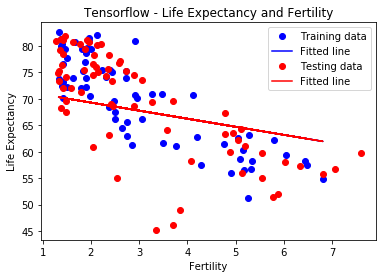

In [65]:
## Linear Regression with Tensorflow ##

# import libraries
from __future__ import print_function
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Split Test & Training Data
fertility=(lf['fertility'])
lifeexp=(lf['life'])

train_X=(fertility[0:69]).values
train_Y=(lifeexp[0:69]).values

test_X=(fertility[70:139]).values
test_Y=(lifeexp[70:139]).values

n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'bo', label='Training data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), 'b',label='Fitted line')
    plt.legend()
   

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'ro', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b),'r',label='Fitted line')
    
    # Label Graph
    _ = plt.title('Tensorflow - Life Expectancy and Fertility')
    _ = plt.xlabel('Fertility')
    _ = plt.ylabel('Life Expectancy')
    plt.legend()
    plt.show()

The Tensorflow Linear Regression produces a very different line that the other Linear Regression Models that we have seen so far. We split the data into test and training and the regression appears to hold true for both. The Tensorflow model is a flatter line with more points above the line on the left and more below on the right.

# How accurate is our model?

We can plot the cost history of training the model and the perdictions against fertilities to give an idea of how accurate the Linear regression model is.

MSE: 0.4303


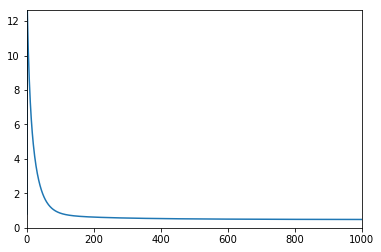

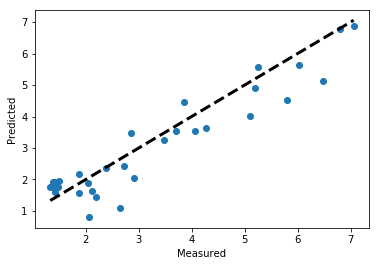

In [298]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import numpy as np
from numpy import genfromtxt

def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def append_bias_reshape(features,labels):
    n_training_samples = features.shape[0] # number of training samples
    n_dim = features.shape[1] #number of feature dimensions
    f = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim + 1]) #reshape features
    l = np.reshape(labels,[n_training_samples,1]) #reshape labels
    return f, l

# Get Data
lf=pd.read_csv('Data/gm_2008_region.csv',encoding = "ISO-8859-1", sep=',',index_col='Unnamed: 0')
# drop none numeric column in lf
lf= lf.drop('Region', axis=1)

# get features and labels
features = lf.drop('fertility', axis=1).values
labels = lf.fertility.values
lf_columns=lf.drop('fertility', axis=1).columns

# Normalise the data
normalized_features = feature_normalize(features)
f, l = append_bias_reshape(normalized_features,labels)
n_dim = f.shape[1]

# Split training and test data
rnd_indices = np.random.rand(len(f)) < 0.80

train_x = f[rnd_indices]
train_y = l[rnd_indices]
test_x = f[~rnd_indices]
test_y = l[~rnd_indices]

learning_rate = 0.01
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)


X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,1])
W = tf.Variable(tf.ones([n_dim,1]))

init =tf.global_variables_initializer()

y_ = tf.matmul(X, W)
cost = tf.reduce_mean(tf.square(y_ - Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        sess.run(training_step,feed_dict={X:train_x,Y:train_y})
        cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: train_x,Y: train_y}))
          
    #calculate mean square error 
    pred_y = sess.run(y_, feed_dict={X: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    print("MSE: %.4f" % sess.run(mse)) 
    
    #plot cost
    plt.plot(range(len(cost_history)),cost_history)
    plt.axis([0,training_epochs,0,np.max(cost_history)])
    ax.set_xlabel('Cost')
    ax.set_ylabel('Distribution')
    plt.show()
    
    #plot predicted/measured
    fig, ax = plt.subplots()
    ax.scatter(test_y, pred_y)
    ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

# Technique 5 : Linear Regression with Keras and Tensorflow

based on https://github.com/queirozfcom/python-sandbox/blob/master/python3/notebooks/television/keras-linear-reg-functional-api.ipynb

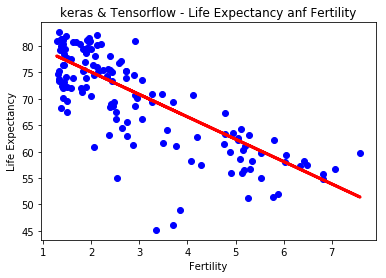

In [332]:
## Linear Regression with Keras and Tensorflow ##

# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

# get and reshape data
lf=pd.read_csv('Data/gm_2008_region.csv',encoding = "ISO-8859-1", sep=',',index_col='Unnamed: 0')
x=lf['fertility'].values.reshape(-1,1).astype(np.float64)
y =lf['life'].values.reshape(-1,1).astype(np.float64)
x.shape,y.shape

inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)

model = Model(inputs=inputs,outputs=preds)
sgd=keras.optimizers.SGD()
model.compile(optimizer=sgd ,loss='mse')
model.fit(x,y, batch_size=1, verbose=0, epochs=20)

plt.scatter(x,y,color='blue')
plt.plot(x,model.predict(x), color='red', linewidth=3)

# Label Graph
_ = plt.title('keras & Tensorflow - Life Expectancy and Fertility')
_ = plt.xlabel('Fertility')
_ = plt.ylabel('Life Expectancy')
plt.show()

## Linear Regression for Normalised Data with Keras and Tensorflow

Sometimes scaling of the variables can affect the Linear Regression, in order to reduce this problem you can Normalise the data prior to producing the linear regression.

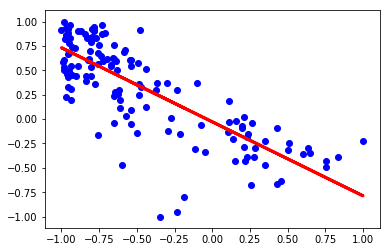

In [305]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
early_stopping_monitor = EarlyStopping(patience=3)

# get and reshape data
lf=pd.read_csv('Data/gm_2008_region.csv',encoding = "ISO-8859-1", sep=',',index_col='Unnamed: 0')
x=lf['fertility'].values.reshape(-1,1).astype(np.float64)
y =lf['life'].values.reshape(-1,1).astype(np.float64)
x.shape,y.shape

# Normalise Data min-max -1,1
sc = MinMaxScaler(feature_range=(-1,1))
x_ = sc.fit_transform(x)
y_ = sc.fit_transform(y)

inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)
sgd=keras.optimizers.SGD()

# generate model
model = Model(inputs=inputs,outputs=preds)
model.compile(optimizer=sgd ,loss='mse')
model.fit(x_,y_, batch_size=1, verbose=0, epochs=20, shuffle=True)

# plot Linear Regression
plt.figure(2)
plt.scatter(x_,y_,color='blue')
plt.plot(x_,model.predict(x_), color='red', linewidth=3)
plt.show()

## Multi Feature Linear Regression with Keras and Tensorflow ## 

You can't easily plot a Linear Regression for a multi featured model on a connensional chart, because you can't easily map multiple dimensions onto a 2 dimensional chart, however you can build a model that will take a dataset with a number of features and use it to make predict for another variable.

For similar reason's you can get a figure for the slope of a single line, because the model is made up of several different relationships each with its own regression slopes. What you can produce to see how well the model is performing is a figure for the loss and the least squares.

The following code can be used to generate such a model from the gap minder data. In this example we have 10 observation, 1 of which is not numeric and can be removed, and 1 of which is the target giving up 8 observatins we therefore are going to use 8 nodes in the model. 

This model is based on the example at
https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

In [4]:
## multi feature Linear regression with Tensorflow and Keras ## 

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
dataframe =pd.read_csv('Data/gm_2008_region.csv',encoding = "ISO-8859-1", sep=',',index_col='Unnamed: 0')
# split into input (X) and output (Y) variables
y=dataframe['fertility'].values
# drop none numeric column in lf
dataframe= dataframe.drop(['Region','fertility'], axis=1)
dataset = dataframe.values
X = dataset[:,1:8]

# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(7, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: 1.74 (2.46) MSE


# How well did the model perform?

We'll plot the results of the predictions on the training data against the actual results to get an idea of how well the model gets the predictions.

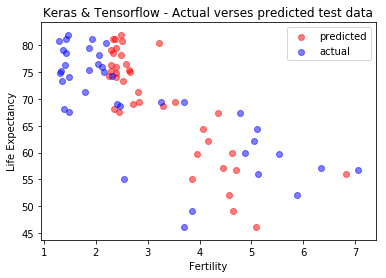

In [8]:
## Keras and TensorFlow predictions versus actuals ##

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
dataframe =pd.read_csv('Data/gm_2008_region.csv',encoding = "ISO-8859-1", sep=',',index_col='Unnamed: 0')
# split into input (X) and output (Y) variables
y=dataframe['fertility']
# drop none numeric column in lf
dataframe= dataframe.drop(['Region','fertility'], axis=1)
dataset = dataframe.values
X = dataset[:,1:8]

train_dataset=(dataframe[0:100]).values
train_X = train_dataset[:,1:8]
train_y=(y[0:100]).values

test_dataset=(dataframe)[101:139].values
test_X=test_dataset[:,1:8]
test_y=(y[101:139])
test_life=dataset[101:139,6]

# create model
model = Sequential()
model.add(Dense(7, input_dim=7, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X,train_y, batch_size=1, verbose=0, epochs=20, shuffle=True)
pred_y=model.predict(test_X)

# Generate a scatter plot of 'life expectancy' and 'fertility' using red circles
plt.scatter(pred_y,test_life, label='predicted', color='red',alpha=0.5, marker='o')
plt.scatter(test_y,test_life, label='actual', color='blue',alpha=0.5, marker='o')
  
# Label Graph and show plot
_ = plt.title('Keras & Tensorflow - Actual verses predicted test data')
_ = plt.xlabel('Fertility')
_ = plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

For this model our data set has 7 features we created a multi feature model using tensorflow with keras, we have split the data to use 101 training data points and tested with the remaining 38 data points. The model needs some work, but the plot gives you an idea of the importance of keeping back testing data and how you can use a plot to compare predicted and actual results to visualize what your model is doing.

# Summary

We looked at 5 approaches to producing a Linear Regressions for a Gapminder Dataset. We found that while the different approaches used very techniques the resulting Linear Regressions were almost identical produced almost identical.

During the Course of this exercise, we explored a number of different ways that we could check whethere a Simple Linear Regression was optimal and at how we might produce a confidence interval or test a hypothesis for the regression. We calculated slopes and used standard statistical tools built into numpy and scipy and built functions to calculate the Pearson's coefficient.

We used Seaborns to visually explore the data, looking at the inter relationships between each of the features, using jointplots with heat maps to visualize the distribution of data within the context of the regression, we plotted the distribution of the residuals and produced a higher order regression. In terms of communicating data about the regressions this was approach can produces some powerful visuals.

We then moved on to look at some machine learning techniques generally these required a lot more coding, they took longer to run and the results varied a lot depending on which technique we chose and how well the model was optomised, but once they were built they were a lot more powerful, we could produce multi feature Linear Regressions which generated data that looked far closer to the shape of real data and we could predict on entire datasets of new data very easily.

We used statsmodels to generate tables of statistics including the slopes of the regressions for each feature, and we used lasso regression in sklearn to generate a plot of the important features within the dataset. We combined keras and tensorslow to produce multi feature linear regression, we then visualised how the model was performing by plotting actual against predicted results for the test data.

In conclussion we discovered that while there are a number of different approaches to tackling Linear regression, for  Simple Linear Regression the results were very similar, for more complex multi feature regressions the results varied a lot more based on which model was used and how it was optimised.

Within the context of this project there were no winners or losers, in fact the different approaches complimented each other rather than competed. The biggest differences between the different approaches, being the way the information was presented. 

While the goal was to produce a Linear Regression, I felt that in part at least, it was going through the process of producing and testing the different Linear Regressions that gave me the most insights into the dataset. 